In [ ]:
#Del archivo original de datos se ha eliminado la ultima linea donde aparece el encabezado
#para evitar errores al momento de cargarlo


 Make a graph of $\Delta EC$ VS $A^{2/3}$. With a least squares program obtain the most suitable straight line for the experimental values. From this obtain a value of the intercept and the constant associated with the Nuclear radius.



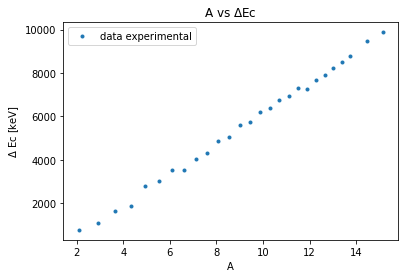

In [ ]:
#importamos las librarias necesarias
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import optimize

#cargamos los datos experimentales
data = np.loadtxt('mycoulomb.dat')
d_A = data[:,1]
A = (data[:,0])**(2/3)

#graficamos los datos experimentales
plt.title('A vs $\Delta$Ec')
plt.xlabel("A")
plt.ylabel('$\Delta$ Ec [keV]')
plt.plot(A,d_A,'.',label='data experimental')
plt.legend()

 Next we apply the equation discussed in class $$\Delta W_{c} = \frac{3}{5} ( \frac{e^{2}}{4\pi \epsilon r_{0}})A^{2/3}$$

In [ ]:
#definimos la funcion lineal para el modelo de dispersion
def lineal(x,m,b):
    return m*x+b

#implementamos la libreria que permite fitear los datos
popt,cov = scipy.optimize.curve_fit(lineal, A, d_A)

#m corresponde a la constante que buscamos medir
m = popt[0]


print('la pendiente calculada por regresion lineal es')
print(m)



la pendiente calculada por regresion lineal es
707.6157682816489


Calculating $r_{0}$ we get

In [ ]:
eps = 8.85e-12
r0 = (3/5)*(1.6e-38)*(1/(4*np.pi*eps*m*1e-16))
print('la magnitud del radio nuclear calculado \n con la pendiente de la recta es')
print(r0*1e15, 'fm') #convertimos de m a fm


la magnitud del radio nuclear calculado 
 con la pendiente de la recta es
1.2198897895733807 fm


The form of the previous equation allows us to make a linear fit with the function $y = mx + b$, making $y = \Delta W_{c}$, $m = \frac{3}{5} ( \frac{e^{2}}{4\pi \epsilon r_{0}})$ y $x = A^{2/3}$

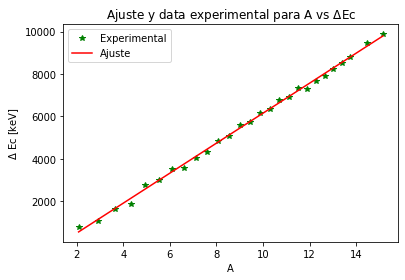

In [ ]:
#creamos arreglos para las nuevas variables del fiteo o ajuste
x_new_value = np.linspace(min(A), max(A),27)
y_new_value = lineal(x_new_value, m,popt[1])

#graficando
plt.plot(A,d_A,'*',color="green",label="Experimental")
plt.plot(x_new_value,y_new_value, color="red",label="Ajuste")
plt.title("Ajuste y data experimental para A vs $\Delta$Ec")
plt.xlabel("A")
plt.ylabel('$\Delta$ Ec [keV]')
plt.legend()

Now let's plot the vertical axis in logarithmic scale to better appreciate the distances between the fit and the data.

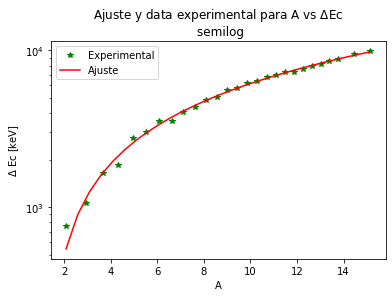

In [ ]:
#graficando
plt.plot(A,d_A,'*',color="green",label="Experimental")
plt.plot(x_new_value,y_new_value, color="red",label="Ajuste")
plt.title("Ajuste y data experimental para A vs $\Delta$Ec \n semilog")
plt.xlabel("A")
plt.ylabel('$\Delta$ Ec [keV]')
plt.yscale('log')
plt.legend()

b) Make a graph of ($\Delta EC - Fit$) vs $A^{2/3}$, where Fit are the values obtained from the line using least squares.

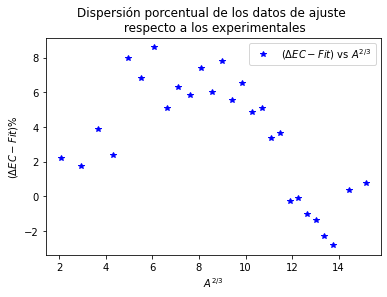

In [ ]:
#graficando
plt.plot(A,(d_A-y_new_value)/100,'*',color="blue",label="($\Delta EC - Fit$) vs $A^{2/3}$")

plt.title("Dispersión porcentual de los datos de ajuste \n respecto a los experimentales")
plt.ylabel("($\Delta EC - Fit$)%")
plt.xlabel('$A^{2/3}$')
plt.legend()

In [ ]:
print("Dispersión porcentual de los datos de ajuste \n respecto a los experimentales")
print((d_A-y_new_value)/100)

Dispersión porcentual de los datos de ajuste 
 respecto a los experimentales
[ 2.20987334  1.73365071  3.89506809  2.39648546  7.98790283  6.80932021
  8.58073758  5.09215495  6.31357233  5.8449897   7.37640707  6.01782445
  7.81924182  5.5606592   6.53207657  4.84349394  5.11491132  3.38632869
  3.64774606 -0.26083656 -0.09941919 -1.00800182 -1.37658444 -2.30516707
 -2.81374969  0.36766768  0.78908505]


According to the graph showing the linear fit and the experimental data, it is possible to observe that the mirror nuclei method is a good technique to calculate the nuclear radius, since it is within the order of magnitude predicted by other models seen in class.

On the other hand, the distance of the fit data is not very large with respect to the experimental data, being within 10% of the predicted radius.